# Final Project Exploratory Data Analysis
# PC Games Released on Epic Games' Online Store up until 05/16/2020

Do your EDA in this notebook!

Lets start by importing the libraries that will be needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


  Now, let's import the csv file that will be used and add it to a variable that will be called, "gameSales". Let's also add a little bit of html and css to make the data look better.

In [2]:
gameSales = pd.read_csv('data/epic_store_games.csv', sep=',', engine='python')
gameSales.head(60)

,title,description,publisher,developer,age,effective_date,platforms,price
0,Among Trees,Among Trees,FJRD Interactive,NaN,NaN,2099-01-01T00:00:00.000Z,Windows,0
1,Flower,Flower,Annapurna Interactive,NaN,NaN,2019-02-14T16:00:00.000Z,Windows,$6.99
2,Metro: 2033 Redux,Metro: 2033 Redux,Deep Silver,NaN,18.0,2019-09-24T10:29:00.000Z,Windows,$19.99
3,Metro: Last Light Redux,Metro: Last Light Redux,Deep Silver,NaN,18.0,2019-05-13T15:00:00.000Z,Windows,$19.99
4,The Crew 2,The Crew 2 Standard Edition,Ubisoft,NaN,NaN,2019-12-04T11:00:00.000Z,Windows,$59.99
5,Nuclear Throne,Nuclear Throne,Ubisoft,NaN,NaN,2019-11-07T16:00:00.000Z,Windows,$11.99
6,Arise: A Simple Story,Arise A Simple Story,Techland,NaN,NaN,2019-12-02T16:00:00.000Z,Windows,$19.99
7,Battle Breakers,Battle Breakers,Techland,NaN,NaN,2019-11-13T18:00:00.000Z,NaN,0
8,South Park: The Fractured But Whole,South Park: The Fractured But Whole Standard E...,Techland,NaN,18.0,2019-12-20T16:00:00.000Z,Windows,$49.99
9,SOMA,SOMA,Frictional Games,NaN,18.0,2019-10-31T15:00:00.000Z,"Windows,Mac",$29.99


In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 2px  blue solid !important;
  color: black !important;
}
</style>

How many rows and columns do we have?

In [4]:
print('Number of Rows is equal to', gameSales.shape[0])
print('Number of columns is equal to', gameSales.shape[1])

Number of Rows is equal to 258
Number of columns is equal to 8


Let's get the name of each column.

In [5]:
gameSales.columns

Index(['title', 'description', 'publisher', 'developer', 'age',
       'effective_date', 'platforms', 'price'],
      dtype='object')

## Data Dictionary

- **title:    Title of Game**

- **description:    The Description of Game**

- **publisher:    Name of Company Who Published Game**

- **developer:    Name of Company Who Developed Game**

- **age:    The Recommended Age In Which Game is Suitable to be Played**

- **effective_date:    The Date In Which Game Was Listed on the Online Store**

- **platforms:    The Platform on Which The Game Can Be Played**

- **price:    The Price of the Game, in USD**

# Data Munging Time!

Let's use describe to get statistics of our data.

In [6]:
gameSales.describe(include='all')

,title,description,publisher,developer,age,effective_date,platforms,price
count,258,258,258,1,88.000000,258,242,258
unique,258,258,84,1,NaN,191,11,20
top,The Jackbox Party Pack 5,Spellbreak Beta Mage,Annapurna Interactive,Avalanche Studios,NaN,2099-01-01T00:00:00.000Z,Windows,$19.99
freq,1,1,19,1,NaN,17,172,63
mean,NaN,NaN,NaN,NaN,16.636364,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,3.308581,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN


It looks like we are getting "NaN" values for data, even though we should be getting actual values. Let's check the datatypes of each column.

In [7]:
gameSales.dtypes

title              object
description        object
publisher          object
developer          object
age               float64
effective_date     object
platforms          object
price              object
dtype: object

Let's change the datatype of the 'effective_date' column.

In [8]:
gameSales['effective_date'] = gameSales['effective_date'].astype('datetime64')
gameSales.dtypes

title                     object
description               object
publisher                 object
developer                 object
age                      float64
effective_date    datetime64[ns]
platforms                 object
price                     object
dtype: object

Hmm, let's get rid of the dollar sign symbol and change the data in the price column to a float datatype. 

In [9]:
gameSales['price'] = gameSales.price.str.replace('$', '').astype(float)

Let's see if it worked.

In [10]:
gameSales.dtypes

title                     object
description               object
publisher                 object
developer                 object
age                      float64
effective_date    datetime64[ns]
platforms                 object
price                    float64
dtype: object

Now, if we look at the statistics of the data...

In [11]:
gameSales.describe(include='all')

,title,description,publisher,developer,age,effective_date,platforms,price
count,258,258,258,1,88.000000,258,242,258.000000
unique,258,258,84,1,NaN,191,11,NaN
top,The Jackbox Party Pack 5,Spellbreak Beta Mage,Annapurna Interactive,Avalanche Studios,NaN,2099-01-01 00:00:00,Windows,NaN
freq,1,1,19,1,NaN,17,172,NaN
first,NaN,NaN,NaN,NaN,NaN,2015-07-30 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2099-11-29 20:22:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,16.636364,NaN,NaN,24.332016
std,NaN,NaN,NaN,NaN,3.308581,NaN,NaN,15.788227
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,14.990000


That's more like it!

As you can see below, there are several empty cells in the "age" column, resulting in NaNs-- 170, to be exact.

In [12]:
gameSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 8 columns):
title             258 non-null object
description       258 non-null object
publisher         258 non-null object
developer         1 non-null object
age               88 non-null float64
effective_date    258 non-null datetime64[ns]
platforms         242 non-null object
price             258 non-null float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 16.2+ KB


Let's replace them with a zero placeholder.

In [13]:
gameSales['age'] = gameSales.age.fillna(0)
gameSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 8 columns):
title             258 non-null object
description       258 non-null object
publisher         258 non-null object
developer         1 non-null object
age               258 non-null float64
effective_date    258 non-null datetime64[ns]
platforms         242 non-null object
price             258 non-null float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 16.2+ KB


Now, let's replace the 16 NaNs in the "platforms" column with the words 'platform-unknown'.

In [14]:
gameSales['platforms'] = gameSales.platforms.fillna('platform-unknown')
gameSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 8 columns):
title             258 non-null object
description       258 non-null object
publisher         258 non-null object
developer         1 non-null object
age               258 non-null float64
effective_date    258 non-null datetime64[ns]
platforms         258 non-null object
price             258 non-null float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 16.2+ KB


Some of the data in the 'platforms' column is displaying as "true". Let's see how many instances of this we have, and replace those instances with 'platform-unknown'.

In [15]:
gameSales[gameSales['platforms'].str.contains('true')]

,title,description,publisher,developer,age,effective_date,platforms,price
253,Battalion Dev Kit,Battalion Dev Kit,Annapurna Interactive,NaN,0.0,2018-07-06 12:12:00,true,0.0
254,Showmaker Dev Kit,Showmaker Dev Kit,Annapurna Interactive,NaN,0.0,2018-08-27 10:24:00,true,0.0
255,PixArk,PixArk,Annapurna Interactive,NaN,0.0,2018-06-25 13:28:00,true,0.0


In [16]:
gameSales['platforms'] = gameSales.platforms.str.replace('true', 'platform-unknown')
gameSales

,title,description,publisher,developer,age,effective_date,platforms,price
0,Among Trees,Among Trees,FJRD Interactive,NaN,0.0,2099-01-01 00:00:00,Windows,0.00
1,Flower,Flower,Annapurna Interactive,NaN,0.0,2019-02-14 16:00:00,Windows,6.99
2,Metro: 2033 Redux,Metro: 2033 Redux,Deep Silver,NaN,18.0,2019-09-24 10:29:00,Windows,19.99
3,Metro: Last Light Redux,Metro: Last Light Redux,Deep Silver,NaN,18.0,2019-05-13 15:00:00,Windows,19.99
4,The Crew 2,The Crew 2 Standard Edition,Ubisoft,NaN,0.0,2019-12-04 11:00:00,Windows,59.99
...,...,...,...,...,...,...,...,...
253,Battalion Dev Kit,Battalion Dev Kit,Annapurna Interactive,NaN,0.0,2018-07-06 12:12:00,platform-unknown,0.00
254,Showmaker Dev Kit,Showmaker Dev Kit,Annapurna Interactive,NaN,0.0,2018-08-27 10:24:00,platform-unknown,0.00
255,PixArk,PixArk,Annapurna Interactive,NaN,0.0,2018-06-25 13:28:00,platform-unknown,0.00
256,Shadow Complex Remastered,ShadowComplexRemastered,tinyBuild,NaN,0.0,2015-07-30 00:00:00,viper,14.99


Did it work? How many instances of 'true' do we have now?

In [17]:
print(gameSales[gameSales['platforms'].str.contains('true')])

Empty DataFrame
Columns: [title, description, publisher, developer, age, effective_date, platforms, price]
Index: []


Woo! The data is all clean now! Let's make some graphs!

# Total Price of Published Games in Last 3 Years

Text(0, 0.5, 'Sales in USD')

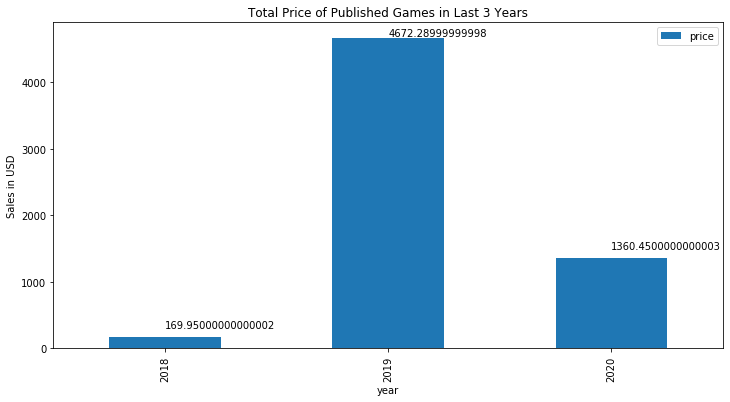

In [18]:
# Creating a 'year' column in GameSales dataframe
gameSales['year'] = gameSales['effective_date'].dt.year

# Creating a 'year' column in GameSales dataframe
gameSales['year'] = gameSales['effective_date'].dt.year

# Creating a new dataframe that will display the total prices per year of published games
pricePerYear = gameSales.groupby('year', as_index=False)['price'].sum()

#creating another dataframe for just the last 3 years
pricePerLastThreeYears = pricePerYear.loc[2:4]

#Plotting the last 3 years' total pricing data on a bargraph
pricePerLastThreeYears.plot.bar(x='year',y='price',title="Total Price of Published Games in Last 3 Years", figsize=(12,6))

firstYear = pricePerLastThreeYears.loc[2]['price']
secondYear = pricePerLastThreeYears.loc[3]['price']
thirdYear = pricePerLastThreeYears.loc[4]['price']

#Adding labels
plt.text(0,300, firstYear)
plt.text(1, 4700, secondYear)
plt.text(2,1500, thirdYear)
plt.ylabel('Sales in USD')

#### Conclusion: The Epic Games Store website was launched in December 2018, so it makes sense that only $169.95 USD worth of games were available. Data for the pricing of games for 2020 is still ongoing, and the year is not over yet, so the low total pricing of games for this year is expected.

# Publisher Battle: Total Price of Electronic Arts games vs. Total Price of Sony Interactive Entertainment games

### I hypothesis that EA (Electronic Arts) total game prices will be much greater than that of Sony Interactive Entertainment, as they seem more popular and I see a lot more games released under their name.   

Text(0, 0.5, 'Total Price in USD')

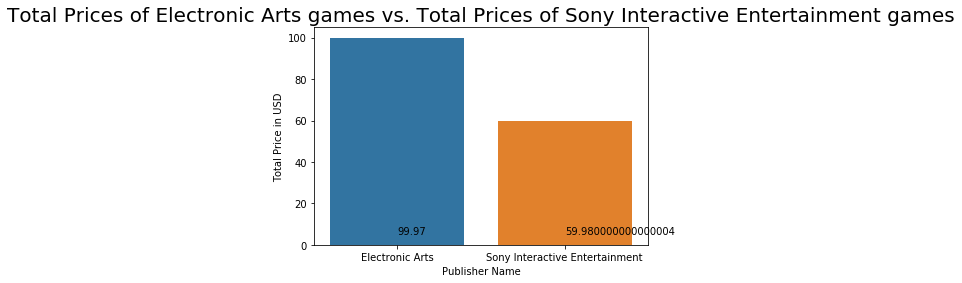

In [19]:
ea_publishers = gameSales[gameSales.publisher == 'Electronic Arts']
sony_publishers = gameSales[gameSales.publisher == 'Sony Interactive Entertainment']

plt.title('Total Prices of Electronic Arts games vs. Total Prices of Sony Interactive Entertainment games', fontdict={'fontname': 'Dejavu Sans', 'fontsize': 20})

easum = ea_publishers['price'].sum()
sonysum = sony_publishers['price'].sum()


ax = sns.barplot(x=['Electronic Arts', 'Sony Interactive Entertainment'], y=[easum, sonysum])


plt.text(0, 5, easum)
plt.text(1, 5, sonysum)

ax.set_xlabel("Publisher Name")
ax.set_ylabel("Total Price in USD")

# Fun with Strings

#### How many game titles include the word "The"?

In [20]:
gameSales[gameSales['title'].str.contains('The' or 'the')]
gameSales.title.str.count("The" or 'the').sum()

47

#### How many game titles include the number "2" or the word "two"?

In [21]:
gameSales[gameSales['title'].str.contains('2' or 'Two')]
gameSales.title.str.count("2" or 'Two').sum()

20

#### What are the most common words when naming video games?

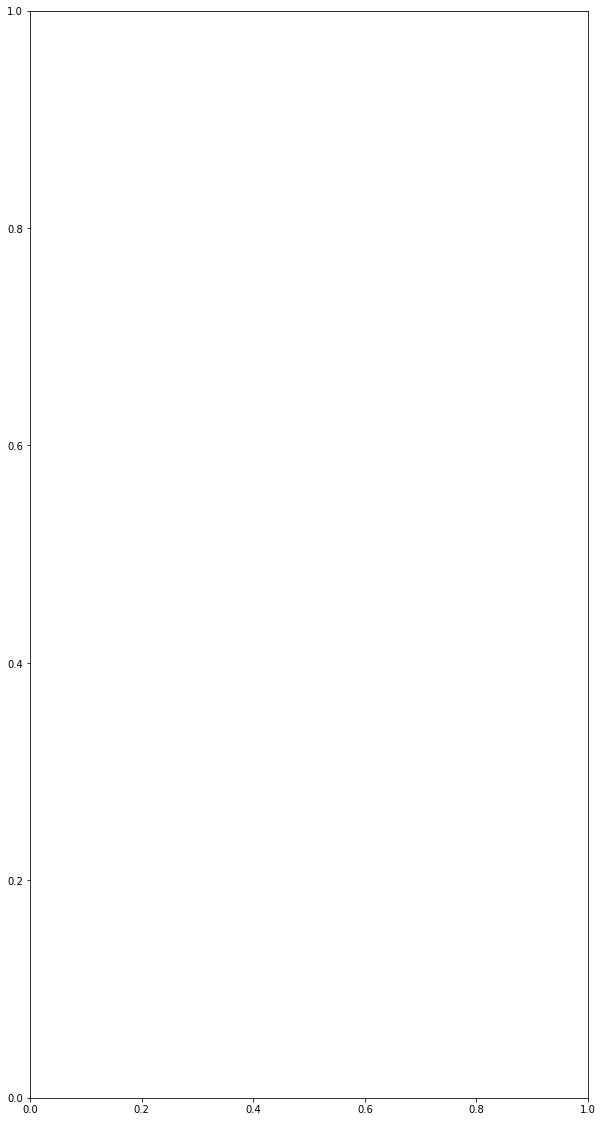

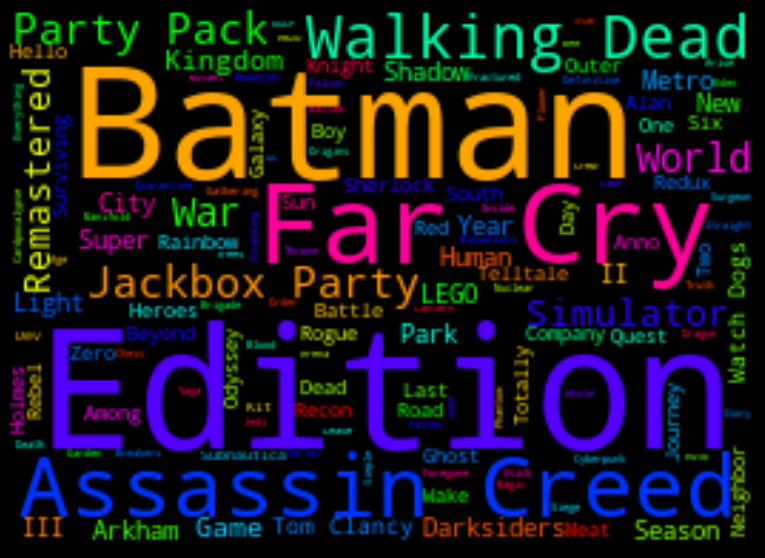

In [22]:
controller_mask = np.array(Image.open("assets/controller_mask.png"))

def transform_format(val):
    if val == 1:
        return 255
    else:
        return val
    

    
# Transform your mask into a new one that will work with the function:
transformed_controller_mask = np.ndarray((controller_mask.shape[0],controller_mask.shape[1]), np.int32)

for i in range(len(controller_mask)):
    transformed_controller_mask[i] = list(map(transform_format, controller_mask[i]))
    


controller_mask= np.array(Image.open("assets/controller_mask.png"))
stopwords = set(STOPWORDS)
#stopwords.update(["II", "III"])
plt.subplots(figsize=(10,20))

stopwords = set(STOPWORDS)
plt.subplots(figsize=(20,10), facecolor = 'k')
wordcloud = WordCloud(mask=controller_mask,background_color="black",colormap="hsv" ,contour_width=2, contour_color="midnightblue",
                      width=800,stopwords=stopwords,
                          height=600
                         ).generate(" ".join(gameSales.title))

plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

#### Conclusion: Commonly used words for game titles include "Edition", "Season" and "Batman".

In [23]:
# controller_mask = np.array(Image.open("assets/controller_mask.png"))
# controller_mask

In [24]:
# freeGamesPerYear = gameSales.groupby('price', as_index=False)['price'].sum()
# freeGamesPerYear

freeGamesPerYear = gameSales[(gameSales['price']==0.00)]

# freeGames = freeGamesPerYear.groupby('year', as_index=False)['price'].count()

# freeGames

freeGamesPerYear

,title,description,publisher,developer,age,effective_date,platforms,price,year
0,Among Trees,Among Trees,FJRD Interactive,NaN,0.0,2099-01-01 00:00:00,Windows,0.0,2099
7,Battle Breakers,Battle Breakers,Techland,NaN,0.0,2019-11-13 18:00:00,platform-unknown,0.0,2019
10,Phantom Brigade,Phantom Brigade,Frictional Games,NaN,0.0,2099-01-01 00:00:00,Windows,0.0,2099
23,Auto Chess,Auto Chess,Balancing Monkey Games,NaN,0.0,2019-08-23 15:00:00,"Windows,Win32",0.0,2019
25,Tom Clancy's Rainbow Six Quarantine,Rainbow Six Quarantine,Balancing Monkey Games,NaN,0.0,2099-01-01 00:00:00,Windows,0.0,2099
32,Surgeon Simulator 2,Surgeon Simulator 2,Bossa,NaN,0.0,2099-01-01 00:00:00,Windows,0.0,2099
33,The Red Lantern,The Red Lantern,Timberline Studio,NaN,0.0,2099-01-01 00:00:00,platform-unknown,0.0,2099
36,Magic The Gathering Arena,Magic: The Gathering Arena,505 Games,NaN,0.0,2020-01-16 18:00:00,"Windows,Win32",0.0,2020
50,Rogue Company,Rogue Company,Sold-Out Software,NaN,0.0,2099-01-01 00:00:00,Windows,0.0,2099
56,Airborne Kingdom,Airborne Kingdom,Paradox Interactive AB,NaN,0.0,2099-01-01 00:00:00,"Windows,Win32,Mac",0.0,2099


# How Many Free Games Were Published in Epic Games Store?

Text(0, 0.5, '# of Free Games Per Year')

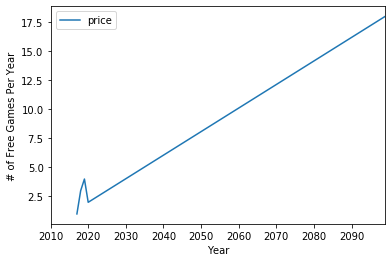

In [25]:
# Creating a new dataframe that will display the number of free published games per year
freeGamesPerYear = gameSales[(gameSales['price']==0.00)]

# Creating another dataframe that will display the total number per year of free published games
freeGames = freeGamesPerYear.groupby('year', as_index=False)['price'].count()

# #Plotting the data using a line graph
ax = freeGames.plot(x ='year', y='price', kind = 'line')


# # Plot ticks with a rotation
ax.set_xlim(2010, 2099, 'ro')

# Set the x-axis label
ax.set_xlabel("Year")

# Set the y-axis label
ax.set_ylabel("# of Free Games Per Year")

# plt.show()

## My hypothesis is that fewer games are released for the MAC. Let's see if that's true.

Text(0.5, 0, 'Platform')

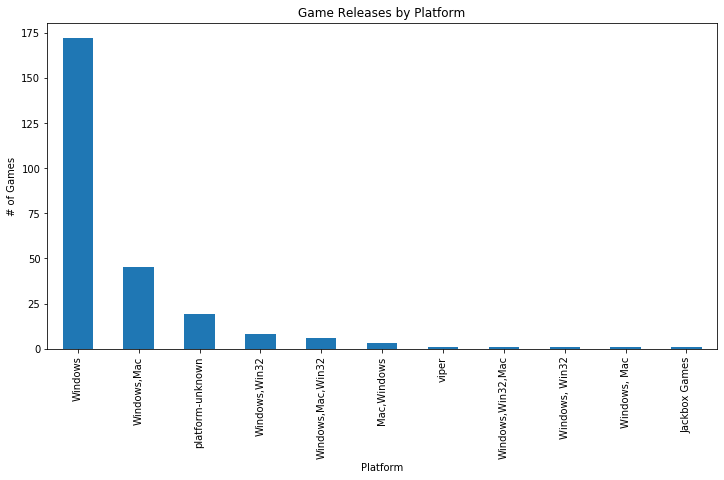

In [26]:
plt.figure(figsize=(12,6))
gameSales['platforms'].value_counts(sort=True,ascending=False).plot.bar()
plt.title('Game Releases by Platform')
plt.ylabel('# of Games')
plt.xlabel('Platform')


#need to do more work here - groupby those that include "Win32", "Windows" and Mac. Then, group by those that include just
#windows. Then, group by those that inlcude just Mac.

In [27]:
# gameSales[gameSales['platforms'].str.contains('Windows')]
# gameSales.platforms.str.count("Window").sum()

# gameSales[gameSales['platforms'].str.contains('Mac')]
# gameSales.platforms.str.count("Mac").sum()

gameSales[gameSales['platforms'].str.contains('Win32')]
#gameSales.platforms.str.count("Win32").sum()

,title,description,publisher,developer,age,effective_date,platforms,price,year
23,Auto Chess,Auto Chess,Balancing Monkey Games,NaN,0.0,2019-08-23 15:00:00,"Windows,Win32",0.00,2019
36,Magic The Gathering Arena,Magic: The Gathering Arena,505 Games,NaN,0.0,2020-01-16 18:00:00,"Windows,Win32",0.00,2020
56,Airborne Kingdom,Airborne Kingdom,Paradox Interactive AB,NaN,0.0,2099-01-01 00:00:00,"Windows,Win32,Mac",0.00,2099
69,Alan Wake,Alan Wake,11 Bit Studios,NaN,0.0,2019-08-02 12:00:00,"Windows,Win32",14.99,2019
81,The End is Nigh,The End is Nigh,Raw Fury,NaN,18.0,2019-09-04 00:00:00,"Windows, Win32",14.99,2019
93,Costume Quest,Costume Quest,Double Fine,NaN,0.0,2019-10-31 15:00:00,"Windows,Win32",9.99,2019
115,Gone Home,Gone Home,The Fullbright Company,NaN,18.0,2020-04-02 15:00:00,"Windows,Mac,Win32",14.99,2020
172,TowerFall Ascension,Towerfall Ascension The Dark World,Matt Makes Games,NaN,0.0,2019-12-20 16:00:00,"Windows,Mac,Win32",19.99,2019
187,Fez,Fez,Iceberg Interactive,NaN,0.0,2019-08-22 00:00:00,"Windows,Mac,Win32",9.99,2019
190,Limbo,Limbo,team17,NaN,0.0,2019-07-18 14:59:00,"Windows,Win32",9.99,2019
